# IEEE Fraud Detection Kaggle Competition

features from: https://www.kaggle.com/roydatascience/light-gbm-with-complete-eda/notebook#Feature-Engineering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
train = pd.read_csv('../../output/train_1.5.2.csv')
test = pd.read_csv('../../output/test_1.5.2.csv')

In [7]:
train.head(10)

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,dist1,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M2,M3,M4,M5,M6,M7,M8,M9,V4,V5,V6,V7,V12,V13,V19,V20,V29,V33,V35,V36,V37,V38,V44,V45,V47,V48,V49,V53,V54,V56,V61,V62,V70,V74,V75,V76,V78,V81,V82,V83,V87,V90,V91,V94,V96,V99,V126,V127,V128,V130,V131,V139,V143,V149,V152,V156,V160,V162,V165,V187,V189,V201,V203,V205,V206,V207,V208,V209,V210,V215,V217,V220,V234,V251,V256,V257,V258,V261,V264,V266,V267,V268,V271,V274,V277,V278,V280,V282,V283,V285,V288,V291,V294,V306,V307,V308,V310,V312,V313,V314,V315,V317,V323,V338,id_01,id_02,id_03,id_05,id_06,id_09,id_13,id_14,id_17,id_19,id_20,id_33,id_38,DeviceInfo_device,DeviceInfo_version,id_30_device,id_30_version,id_31_device,M_sum,card1_TransactionAmt_mean,card1_TransactionAmt_std,card2_TransactionAmt_mean,card2_TransactionAmt_std,card3_TransactionAmt_mean,card5_TransactionAmt_mean,card5_TransactionAmt_std,uid_TransactionAmt_mean,uid_TransactionAmt_std,uid2_TransactionAmt_mean,uid2_TransactionAmt_std,card1_fq_enc,card2_fq_enc,card3_fq_enc,card5_fq_enc,C1_fq_enc,C2_fq_enc,C5_fq_enc,C6_fq_enc,C8_fq_enc,C9_fq_enc,C10_fq_enc,C11_fq_enc,C12_fq_enc,C13_fq_enc,C14_fq_enc,D1_fq_enc,D2_fq_enc,D3_fq_enc,D4_fq_enc,D5_fq_enc,D6_fq_enc,D8_fq_enc,D9_fq_enc,addr1_fq_enc,dist1_fq_enc,P_emaildomain_fq_enc,R_emaildomain_fq_enc,DeviceType_fq_enc,DeviceInfo_fq_enc,DeviceInfo_device_fq_enc,DeviceInfo_version_fq_enc,id_30_fq_enc,id_30_device_fq_enc,id_30_version_fq_enc,id_31_device_fq_enc,id_33_fq_enc,uid_fq_enc,uid2_fq_enc,address_match,isFraud
0,68.5,4,13926.0,NaN,150.0,1,142.0,1,315.0,19.0,49,49,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,1,1,2,0,1,2,2,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,117.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,461,2,1309,0,7,0,58,10,316.575714,351.524039,NaN,NaN,147.654107,185.226505,322.071061,257.916667,210.732868,193.000000,176.069589,56.0,NaN,956845.0,309.0,586742,581696,707008,631237,816304,420354,824420,168780,856080,367617,598520,5548.0,NaN,11525.0,NaN,NaN,NaN,NaN,NaN,43035.0,4707.0,163648,824070,819490,863508,863508,1020772,949007,949007,954725,820324,953271,6,2,1.000000,0
1,29.0,4,2755.0,404.0,150.0,2,102.0,1,325.0,NaN,16,49,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,2,2,0,1,1,2,2,2,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,461,2,1309,0,7,0,58,14,213.049634,391.476678,227.105499,373.667709,147.654107,212.795276,396.389379,213.625354,392.729696,239.966476,503.600968,1338.0,5593.0,956845.0,49491.0,586742,581696,707008,631237,816304,341561,824420,731792,856080,367617,598520,507854.0,NaN,NaN,344849.0,NaN,NaN,NaN,NaN,76902.0,NaN,435803,824070,819490,863508,863508,1020772,949007,949007,954725,820324,953271,1328,105,0.992128,0
2,59.0,4,4663.0,490.0,150.0,4,166.0,2,330.0,287.0,35,49,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,1,1,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
test.head()

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,dist1,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M2,M3,M4,M5,M6,M7,M8,M9,V4,V5,V6,V7,V12,V13,V19,V20,V29,V33,V35,V36,V37,V38,V44,V45,V47,V48,V49,V53,V54,V56,V61,V62,V70,V74,V75,V76,V78,V81,V82,V83,V87,V90,V91,V94,V96,V99,V126,V127,V128,V130,V131,V139,V143,V149,V152,V156,V160,V162,V165,V187,V189,V201,V203,V205,V206,V207,V208,V209,V210,V215,V217,V220,V234,V251,V256,V257,V258,V261,V264,V266,V267,V268,V271,V274,V277,V278,V280,V282,V283,V285,V288,V291,V294,V306,V307,V308,V310,V312,V313,V314,V315,V317,V323,V338,id_01,id_02,id_03,id_05,id_06,id_09,id_13,id_14,id_17,id_19,id_20,id_33,id_38,DeviceInfo_device,DeviceInfo_version,id_30_device,id_30_version,id_31_device,M_sum,card1_TransactionAmt_mean,card1_TransactionAmt_std,card2_TransactionAmt_mean,card2_TransactionAmt_std,card3_TransactionAmt_mean,card5_TransactionAmt_mean,card5_TransactionAmt_std,uid_TransactionAmt_mean,uid_TransactionAmt_std,uid2_TransactionAmt_mean,uid2_TransactionAmt_std,card1_fq_enc,card2_fq_enc,card3_fq_enc,card5_fq_enc,C1_fq_enc,C2_fq_enc,C5_fq_enc,C6_fq_enc,C8_fq_enc,C9_fq_enc,C10_fq_enc,C11_fq_enc,C12_fq_enc,C13_fq_enc,C14_fq_enc,D1_fq_enc,D2_fq_enc,D3_fq_enc,D4_fq_enc,D5_fq_enc,D6_fq_enc,D8_fq_enc,D9_fq_enc,addr1_fq_enc,dist1_fq_enc,P_emaildomain_fq_enc,R_emaildomain_fq_enc,DeviceType_fq_enc,DeviceInfo_fq_enc,DeviceInfo_device_fq_enc,DeviceInfo_version_fq_enc,id_30_fq_enc,id_30_device_fq_enc,id_30_version_fq_enc,id_31_device_fq_enc,id_33_fq_enc,uid_fq_enc,uid2_fq_enc,address_match
0,31.95,4,10409.0,111.0,150.0,4,226.0,2,170.0,1.0,16,49,6.0,6.0,0.0,3.0,4.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,1,0,3,2,0,1,1,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.00,47.95,0.00,47.95,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.00,47.95,0.00,47.95,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,461,2,1309,0,7,0,58,7,111.438600,127.023935,150.514124,258.885388,147.654107,141.866634,242.451852,111.438600,127.023935,113.344524,136.975675,150.0,82537.0,956845.0,553537.0,19774.0,20344.0,23888.0,34225.0,816304.0,10670.0,824420.0,16366.0,185008.0,177.0,15344.0,357.0,356.0,5665.0,467.0,4549.0,NaN,NaN,NaN,3810.0,36355.0,435803,824070,819490,863508,863508,1020772,949007,949007,954725,820324,953271,150,126,0.991406
1,49.00,4,4272.0,111.0,150.0,4,226.0,2,299.0,4.0,2,49,3.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,231.0,634.0,NaN,NaN,NaN,634.0,0,0,0,2,0,2,2,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,4.0,0.00,280.00,77.00,280.00,77.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,4.0,0.0,1.0,0.0,0.00,280.00,77.00,280.00,77.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,461,2,1309,0,7,0,58,9,154.215352,315.247290,150.514124,258.885388,147.654107,141.866634,242.451852,153.557480,315.291415,159.051437,330.973995,2077.0,82537.0,956845.0,553537.0,96569.0,197032.0,707008.0,631237.0,816304.0,146643.0,824420.0,731792.0,185008.0,15633.0,175757.0,955.0,923.0,24762.0,291.0,18837.0,NaN,NaN,NaN,85045.0,25204.0,52337,824070,819490,863508,863508,1020772,949007,949007,954725,820324,953271,2061,1775,0.991406
2,171.00,4,4476.0,574.0,150.0,4,226.0,2,472.0,2636.0,19,49,2.0,2.0,0.0,0.0,5.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,136.0,136.0,NaN,NaN,NaN,97.0,1,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0

In [24]:
one_value_cols = [col for col in train.columns if train[col].nunique() <= 1]
one_value_cols_test = [col for col in test.columns if test[col].nunique() <= 1]

many_null_cols = [col for col in train.columns if train[col].isnull().sum() / train.shape[0] > 0.9]
many_null_cols_test = [col for col in test.columns if test[col].isnull().sum() / test.shape[0] > 0.9]

big_top_value_cols = [col for col in train.columns if train[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]
big_top_value_cols_test = [col for col in test.columns if test[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]

cols_to_drop = list(set(many_null_cols + many_null_cols_test + big_top_value_cols + big_top_value_cols_test + one_value_cols + one_value_cols_test))
cols_to_drop.remove('isFraud')
print('{} features are going to be dropped for being useless'.format(len(cols_to_drop)))

KeyboardInterrupt: 

In [11]:
train = train.drop(cols_to_drop, axis=1)
test = test.drop(cols_to_drop, axis=1)

In [10]:
cols_to_drop

['DeviceInfo_version_fq_enc', 'DeviceInfo_version']

In [14]:
train['card1_TransactionAmt_ratio'] = train['TransactionAmt'] / train['card1_TransactionAmt_mean']

In [15]:
test['card1_TransactionAmt_ratio'] = test['TransactionAmt'] / test['card1_TransactionAmt_mean']

In [17]:
train['card1_TransactionAmt_std_ratio'] = train['TransactionAmt'] / train['card1_TransactionAmt_std']

In [18]:
test['card1_TransactionAmt_std_ratio'] = test['TransactionAmt'] / test['card1_TransactionAmt_std']

In [21]:
train['log_TransactionAmt'] = np.log(train['TransactionAmt'])

In [22]:
test['log_TransactionAmt'] = np.log(test['TransactionAmt'])

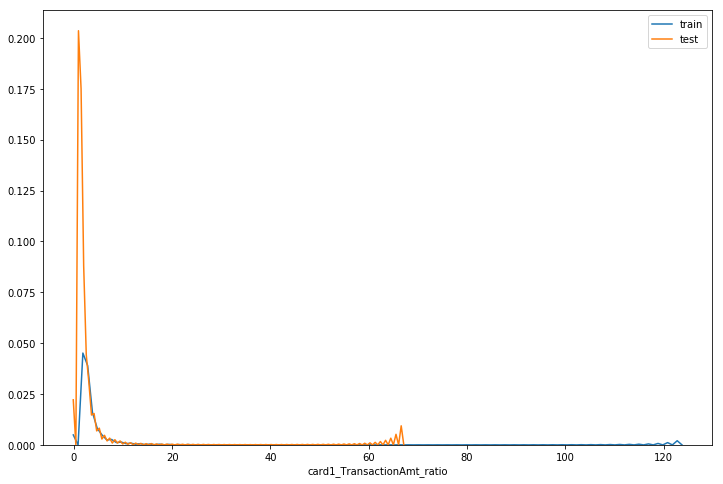

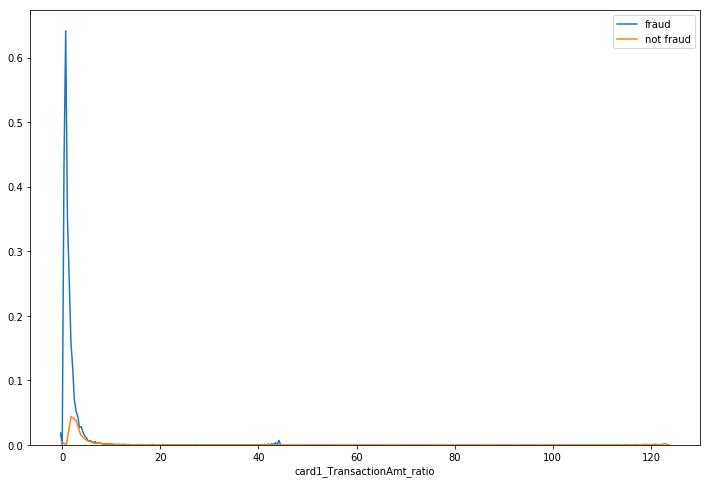

In [20]:
plt.figure(figsize=(12,8))
sns.distplot(train['card1_TransactionAmt_ratio'], label='train', hist=False)
sns.distplot(test['card1_TransactionAmt_ratio'], label='test', hist=False)
plt.legend()
plt.show()


plt.figure(figsize=(12,8))
sns.distplot(train[(train['isFraud'] == 1) 
                   & (train['card1_TransactionAmt_ratio'].notna())]['card1_TransactionAmt_ratio'],
             label='fraud', hist=False)
sns.distplot(train[(train['isFraud'] == 0) &
                   (train['card1_TransactionAmt_ratio'].notna())]['card1_TransactionAmt_ratio'],
             label='not fraud', hist=False)
plt.legend()
plt.show()

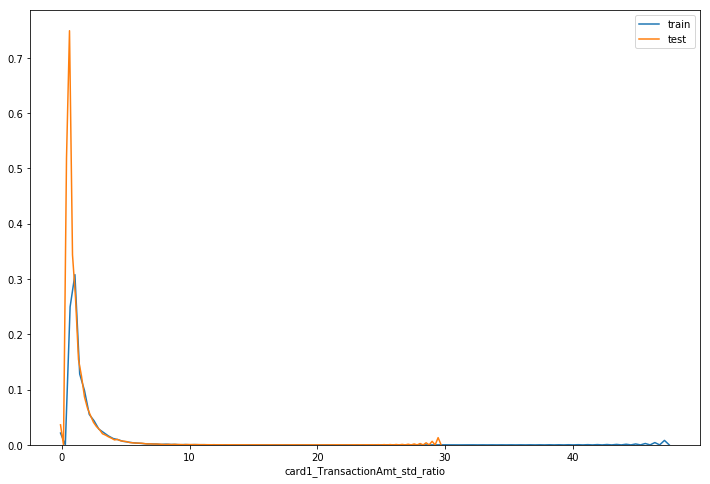

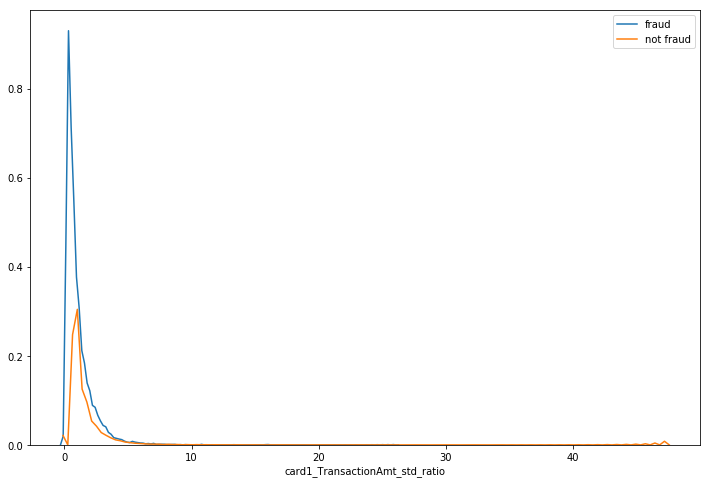

In [19]:
plt.figure(figsize=(12,8))
sns.distplot(train['card1_TransactionAmt_std_ratio'], label='train', hist=False)
sns.distplot(test['card1_TransactionAmt_std_ratio'], label='test', hist=False)
plt.legend()
plt.show()


plt.figure(figsize=(12,8))
sns.distplot(train[(train['isFraud'] == 1) 
                   & (train['card1_TransactionAmt_std_ratio'].notna())]['card1_TransactionAmt_std_ratio'],
             label='fraud', hist=False)
sns.distplot(train[(train['isFraud'] == 0) &
                   (train['card1_TransactionAmt_std_ratio'].notna())]['card1_TransactionAmt_std_ratio'],
             label='not fraud', hist=False)
plt.legend()
plt.show()

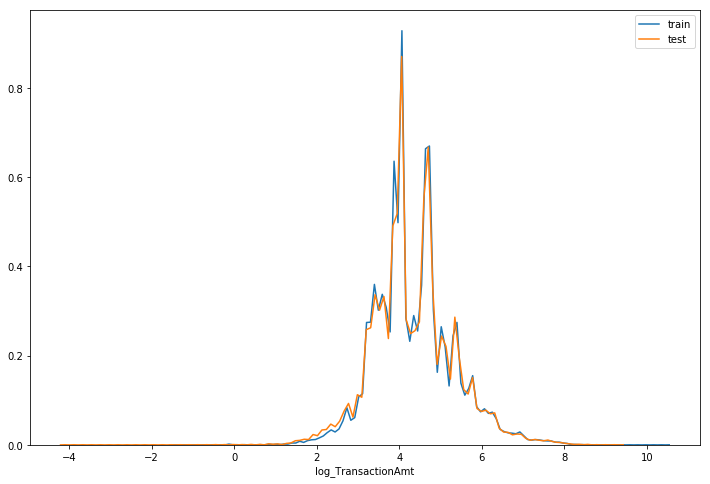

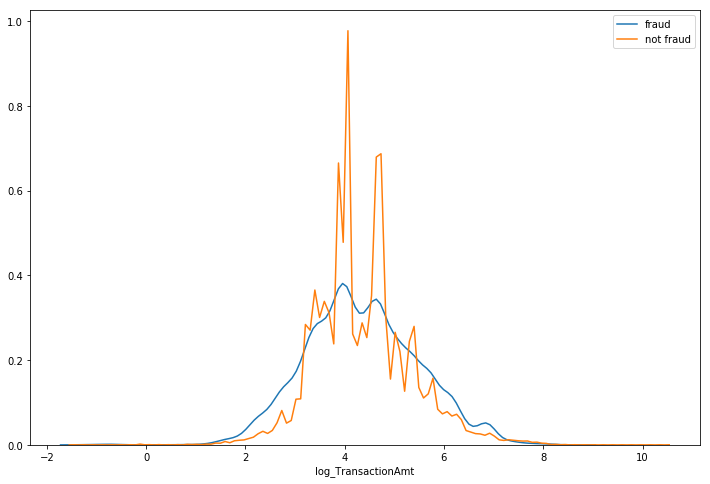

In [23]:
plt.figure(figsize=(12,8))
sns.distplot(train['log_TransactionAmt'], label='train', hist=False)
sns.distplot(test['log_TransactionAmt'], label='test', hist=False)
plt.legend()
plt.show()


plt.figure(figsize=(12,8))
sns.distplot(train[(train['isFraud'] == 1) 
                   & (train['log_TransactionAmt'].notna())]['log_TransactionAmt'],
             label='fraud', hist=False)
sns.distplot(train[(train['isFraud'] == 0) &
                   (train['log_TransactionAmt'].notna())]['log_TransactionAmt'],
             label='not fraud', hist=False)
plt.legend()
plt.show()

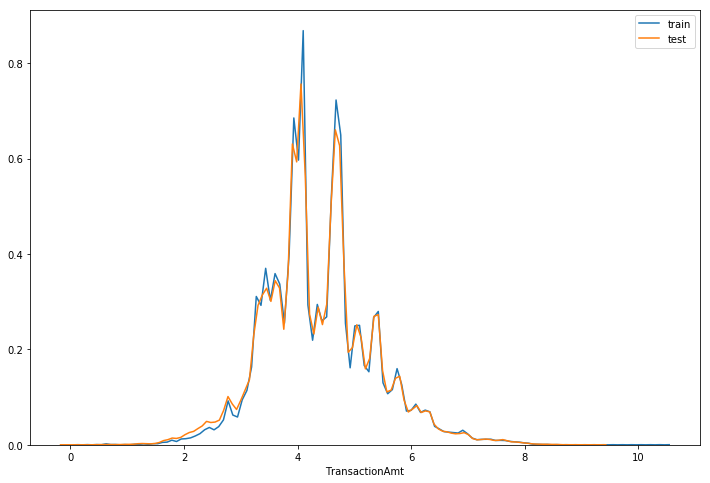

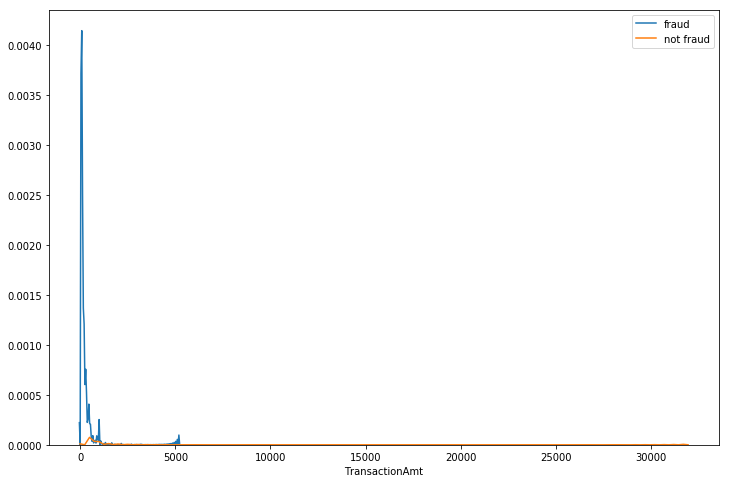

In [25]:
plt.figure(figsize=(12,8))
sns.distplot(np.log1p(train['TransactionAmt']), label='train', hist=False)
sns.distplot(np.log1p(test['TransactionAmt']), label='test', hist=False)
plt.legend()
plt.show()


plt.figure(figsize=(12,8))
sns.distplot(train[(train['isFraud'] == 1) 
                   & (np.log1p(train['TransactionAmt']).notna())]['TransactionAmt'],
             label='fraud', hist=False)
sns.distplot(train[(train['isFraud'] == 0) &
                   (np.log1p(train['TransactionAmt']).notna())]['TransactionAmt'],
             label='not fraud', hist=False)
plt.legend()
plt.show()

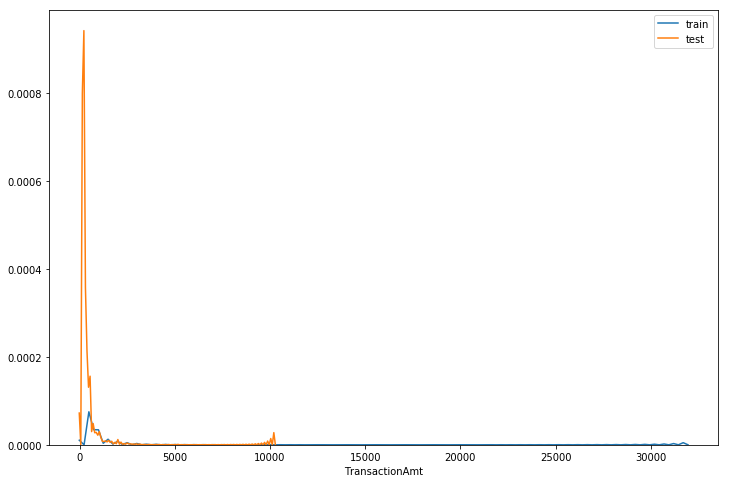

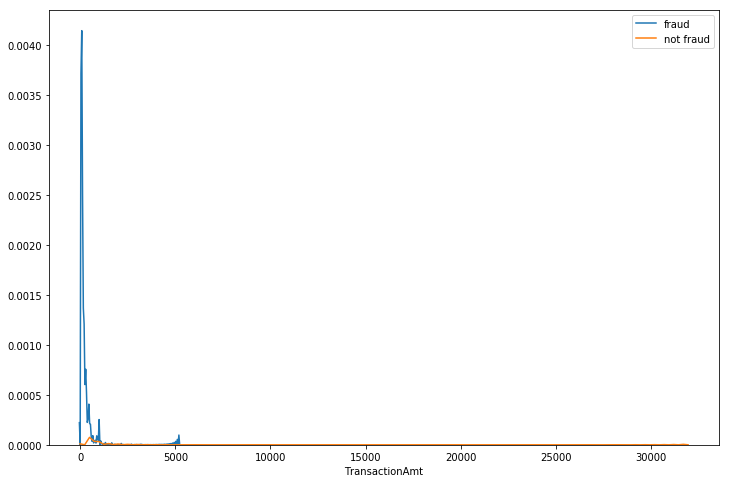

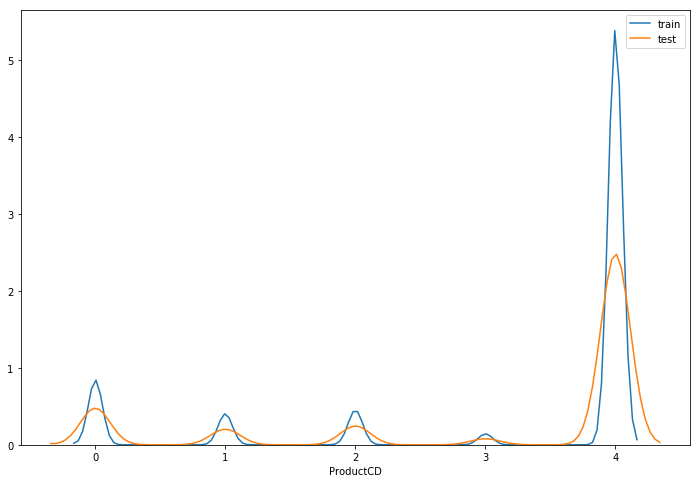

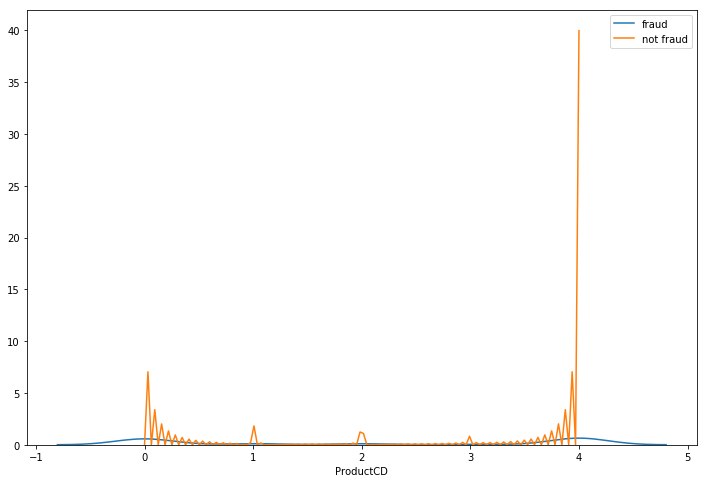

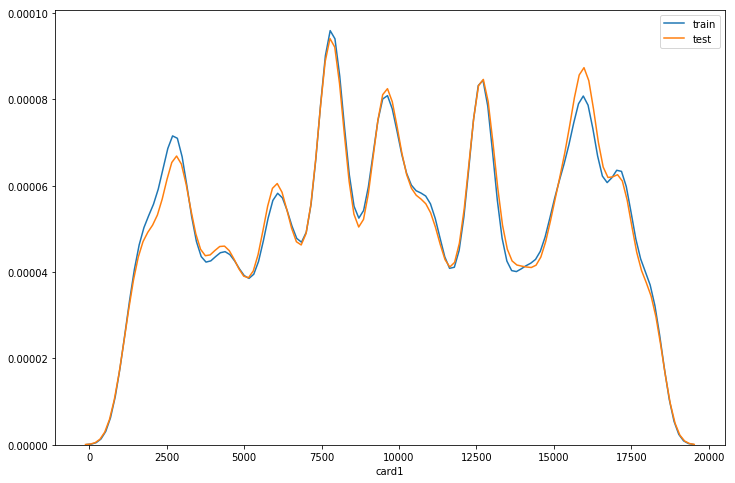

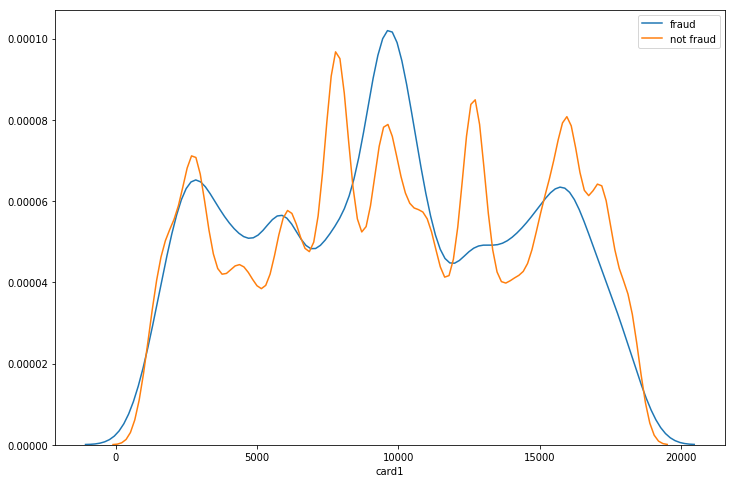

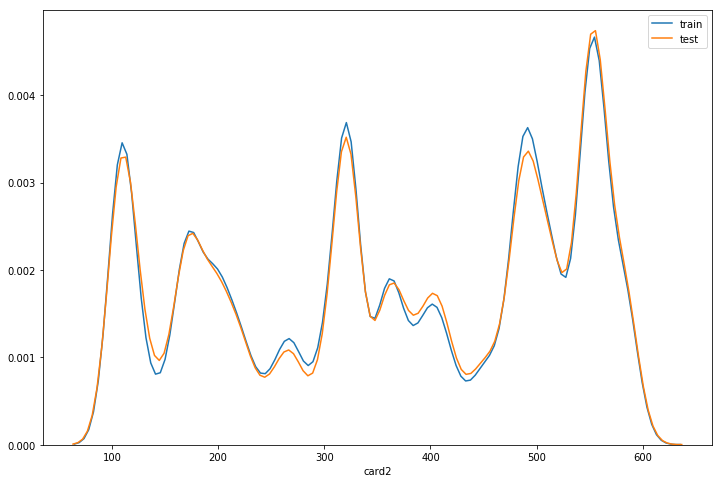

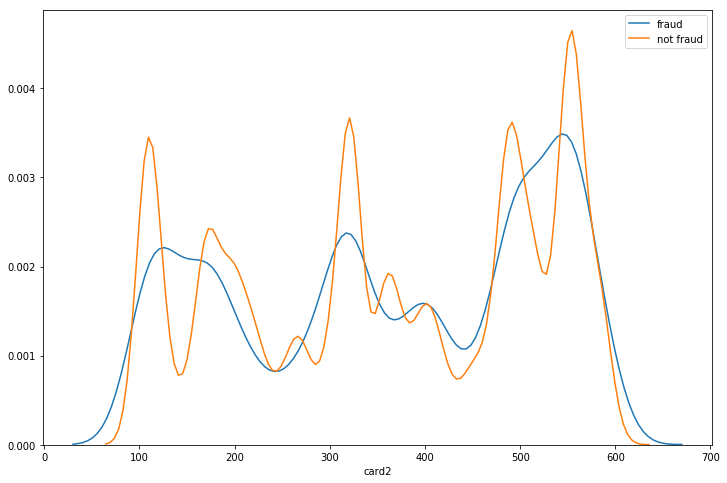

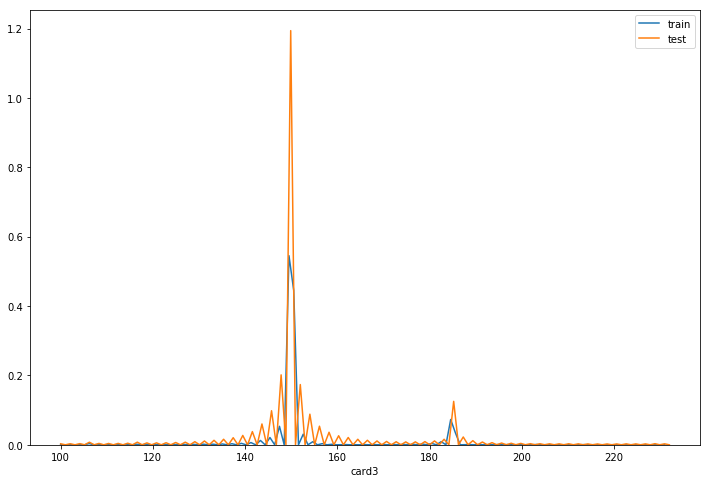

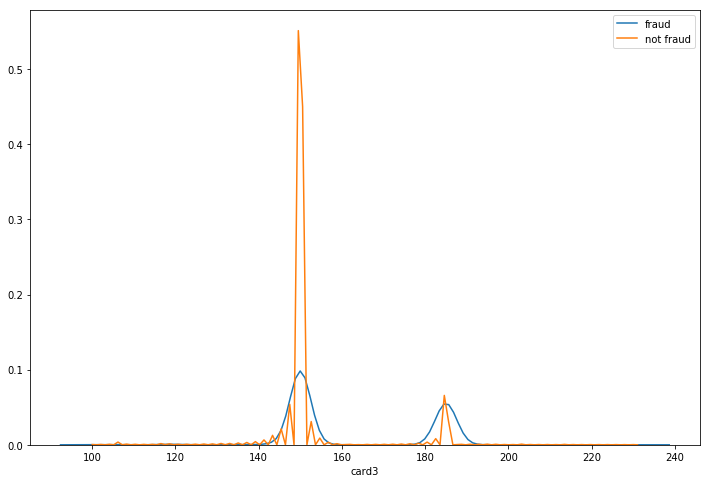

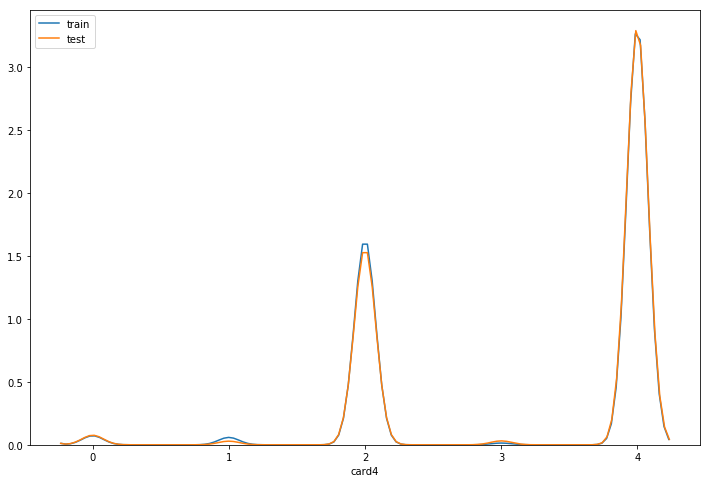

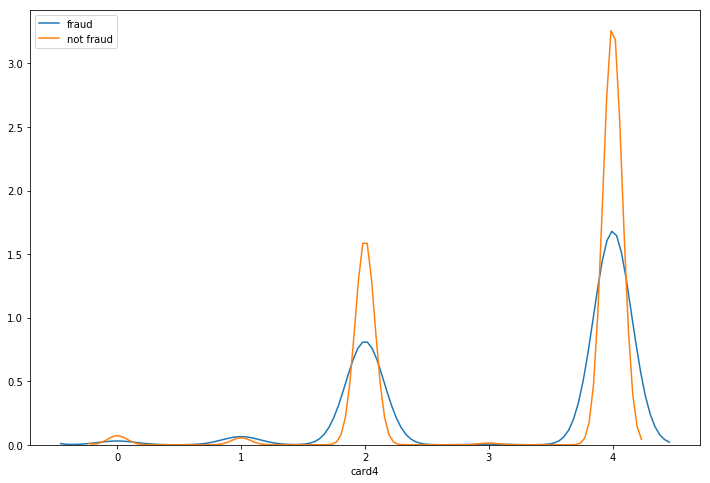

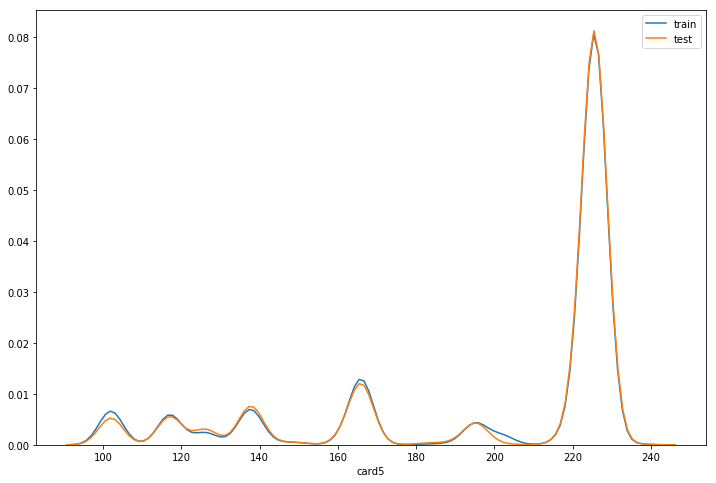

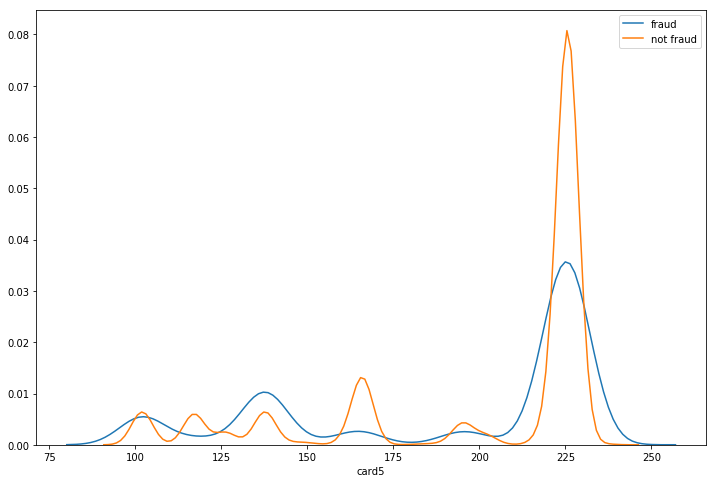

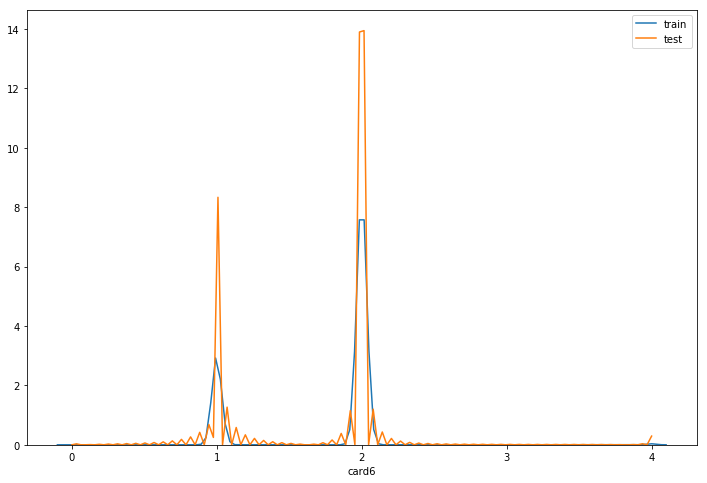

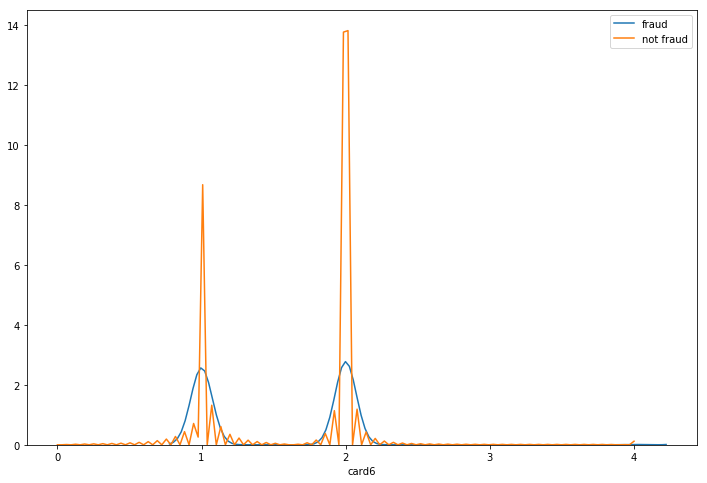

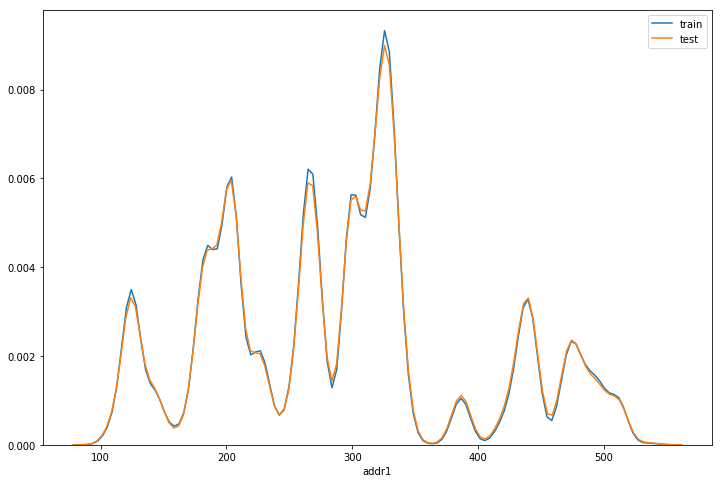

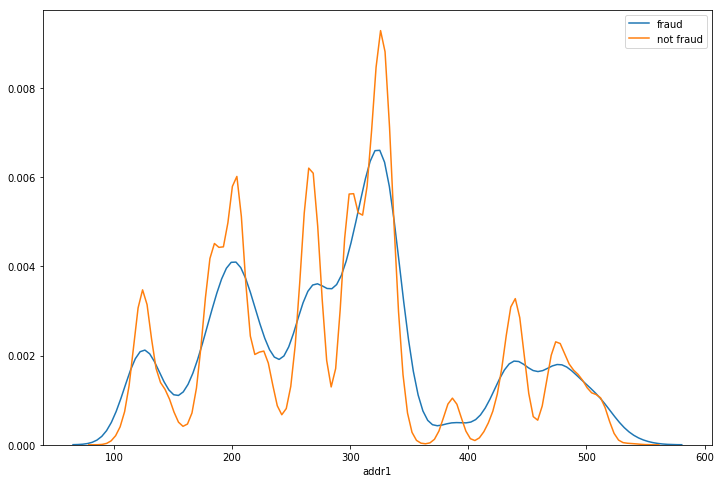

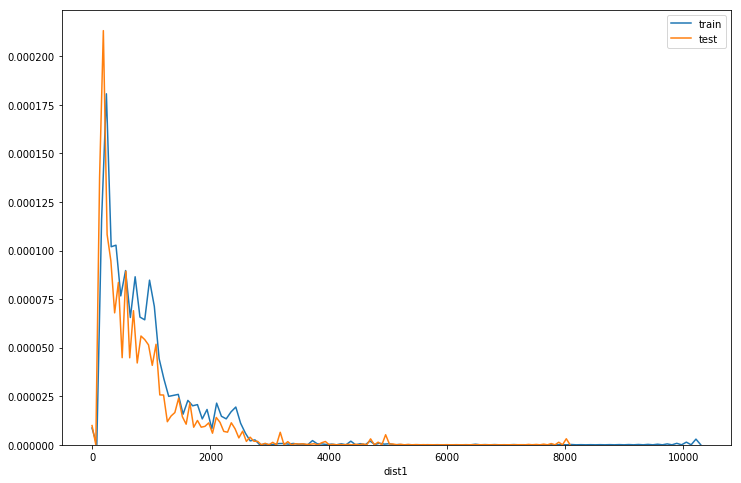

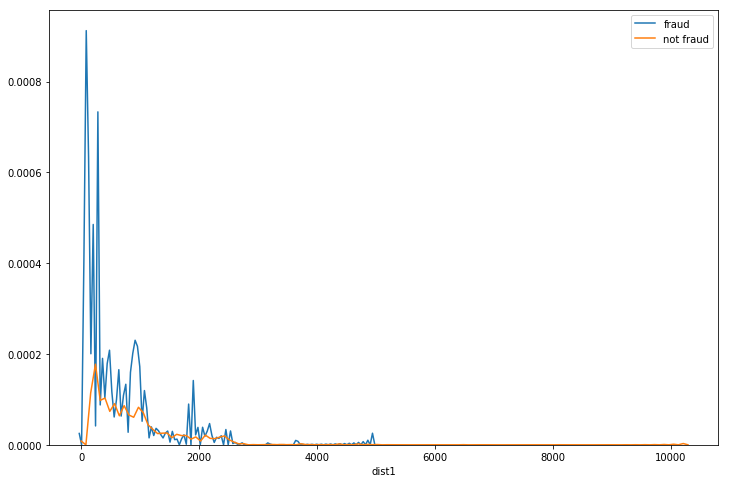

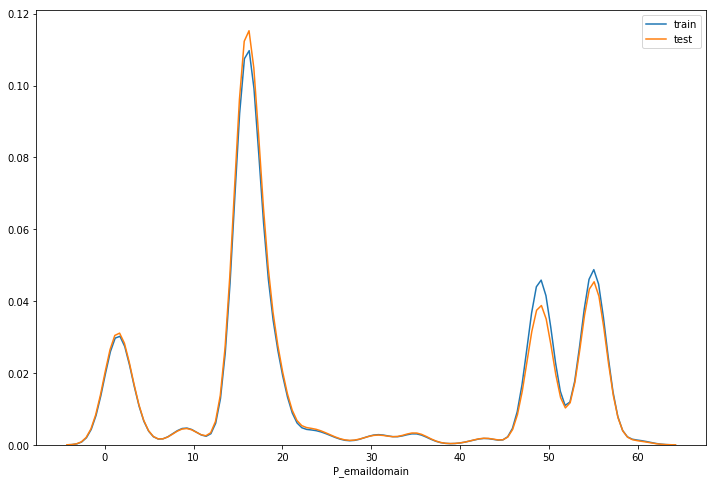

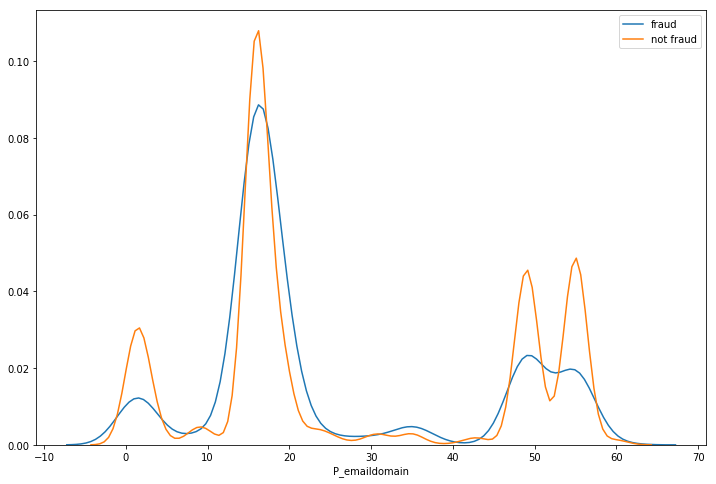

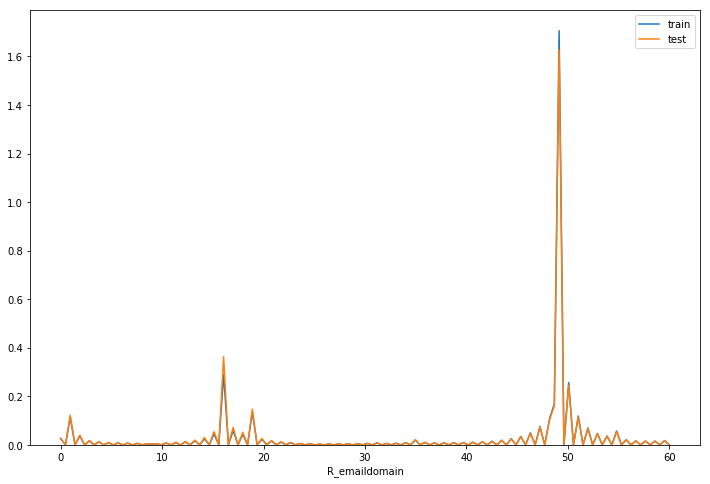

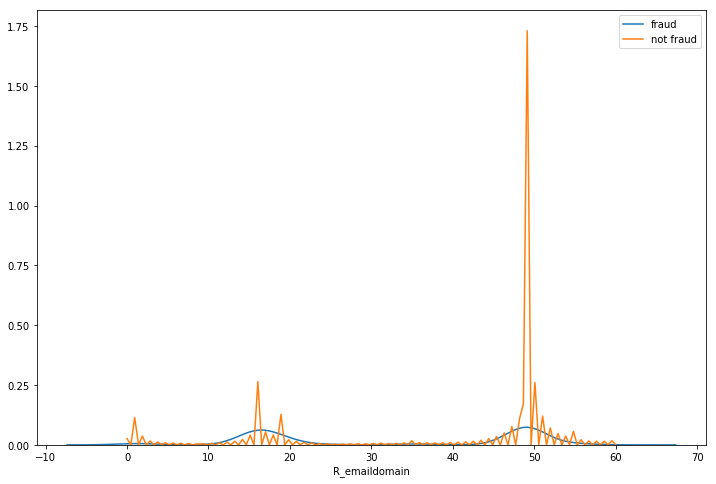

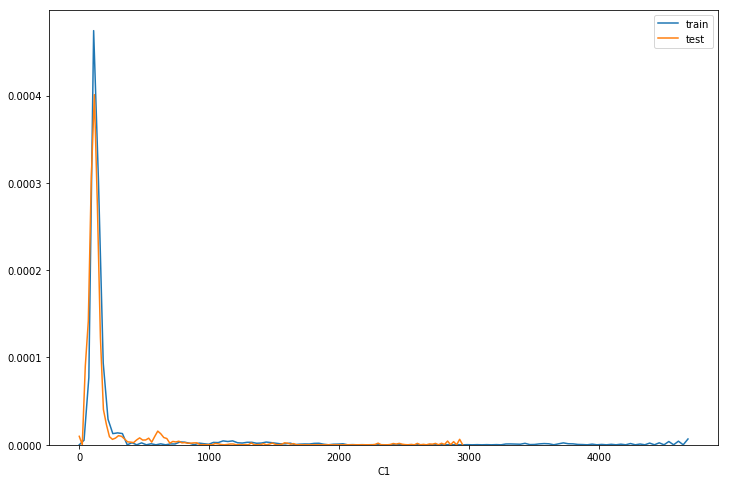

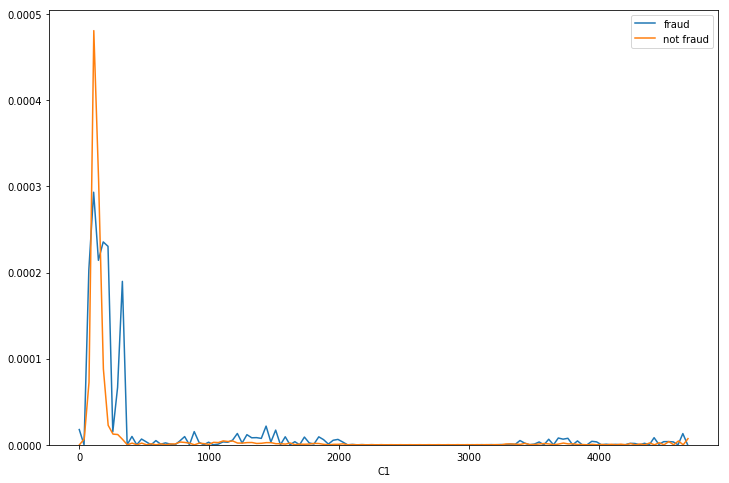

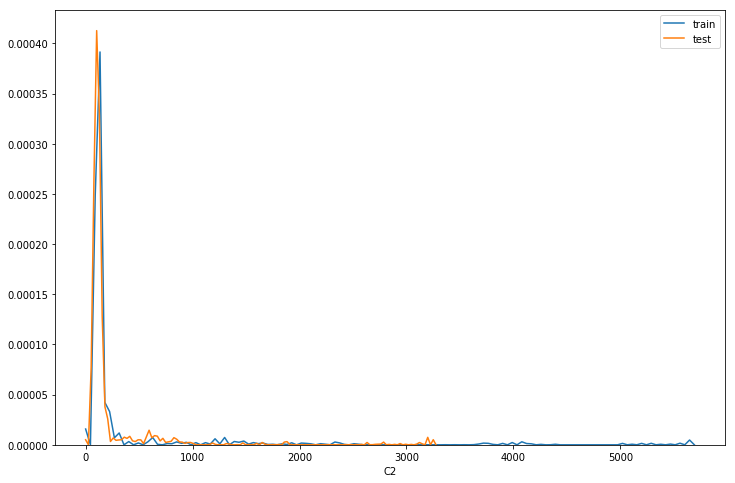

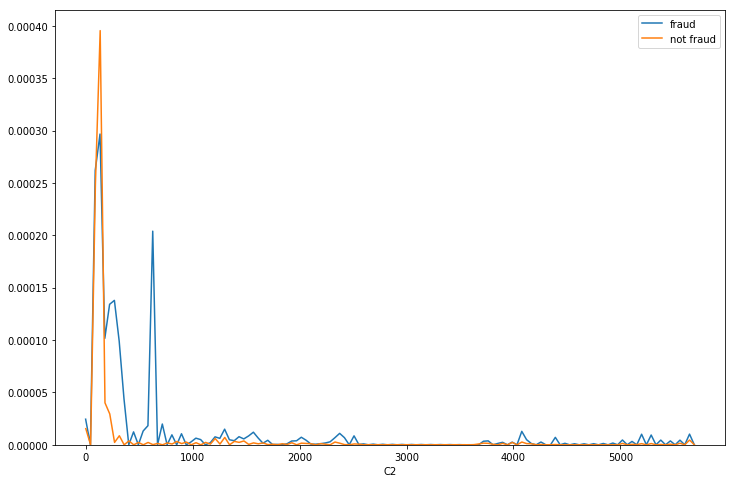

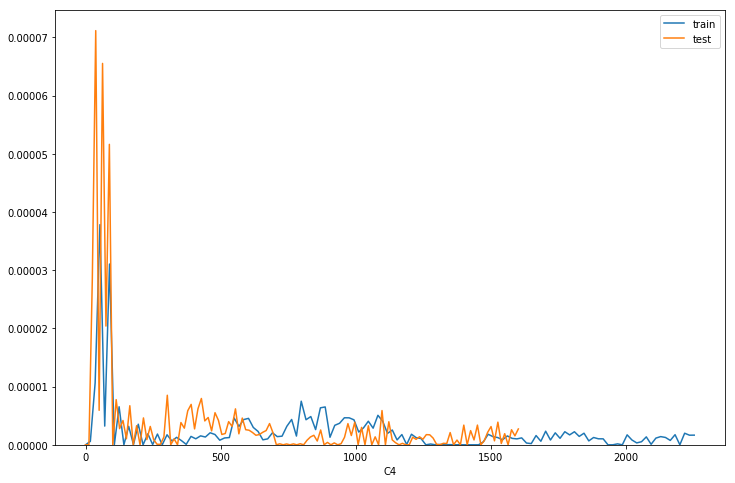

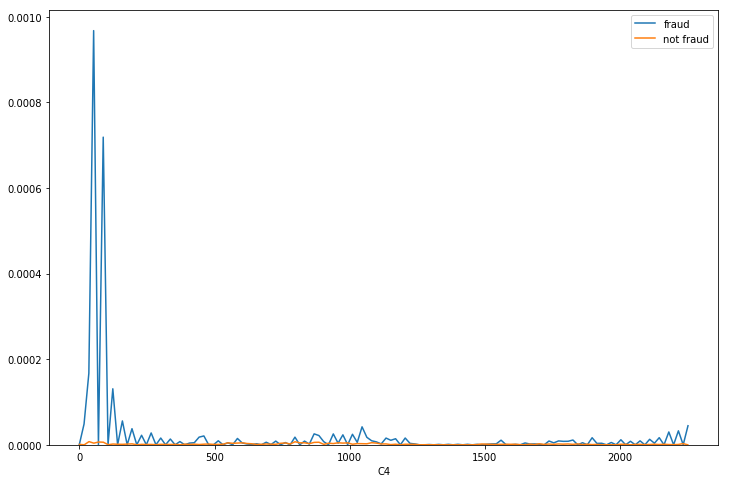

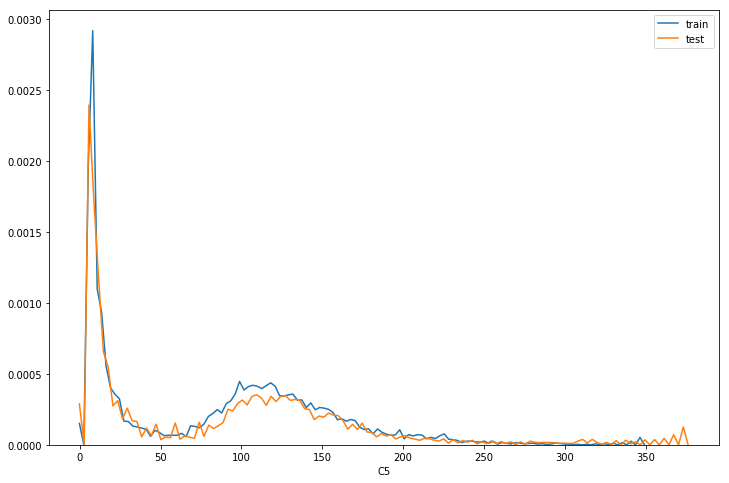

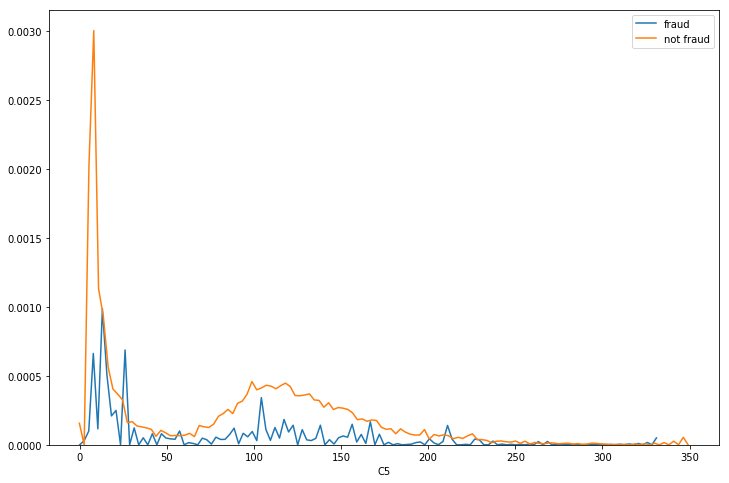

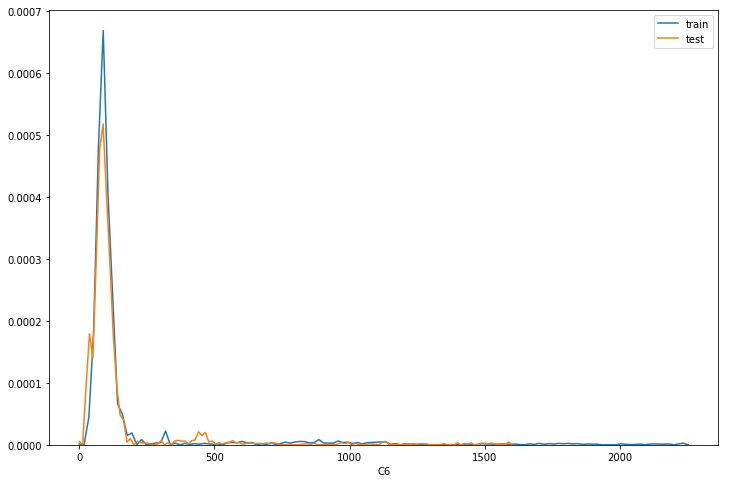

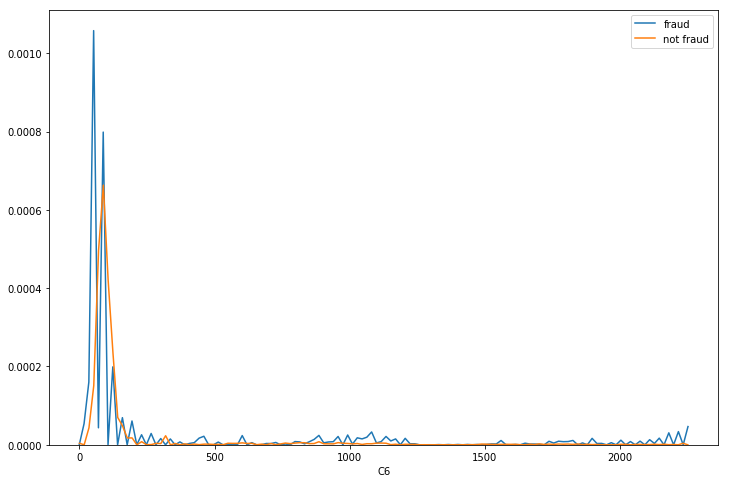

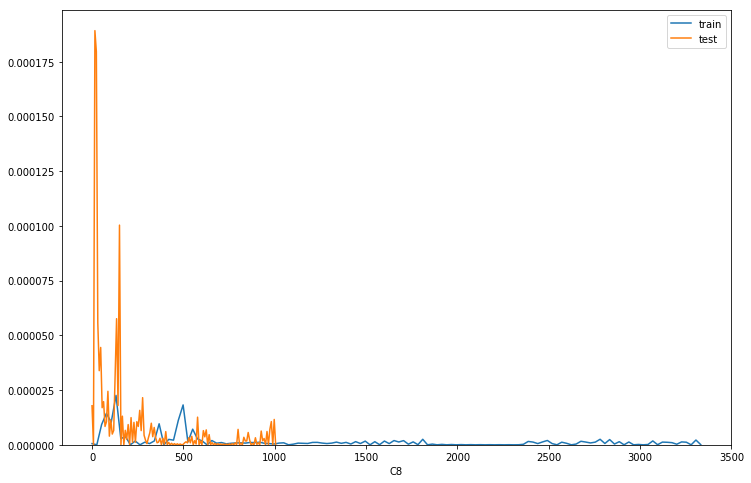

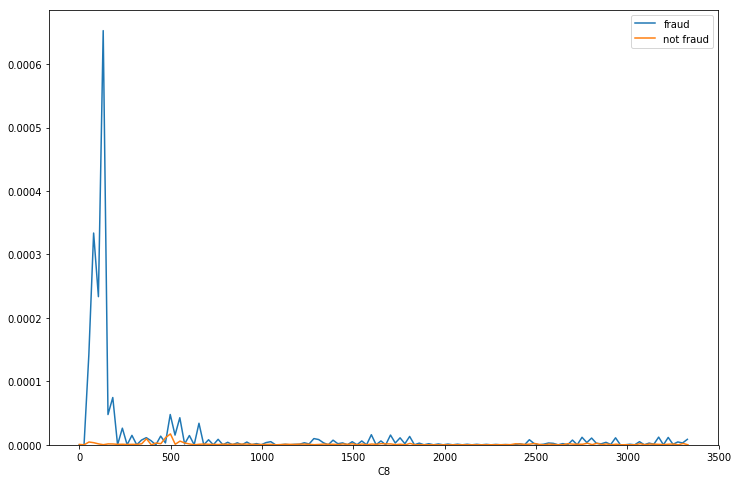

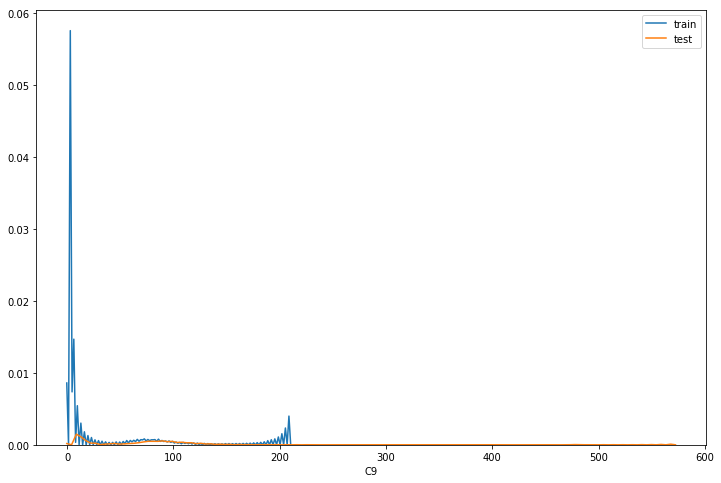

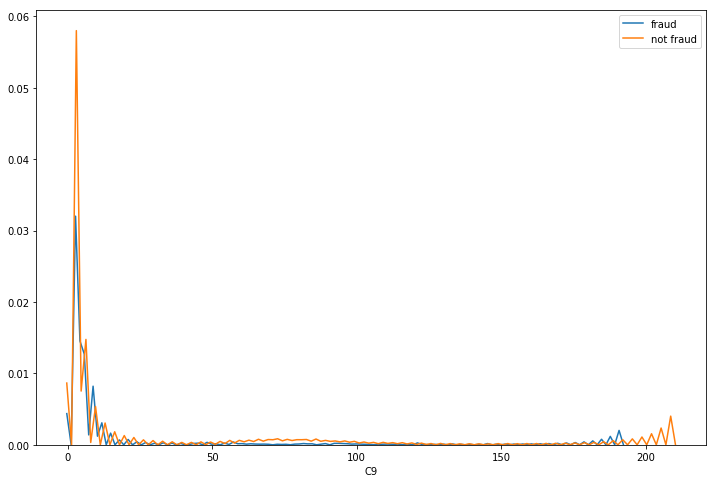

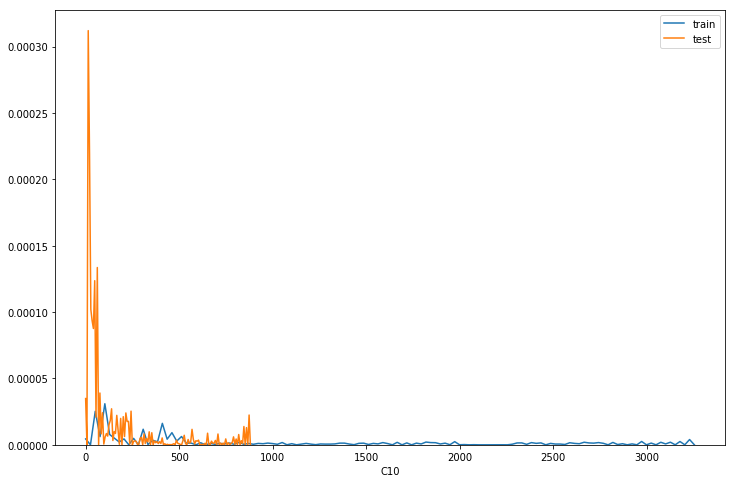

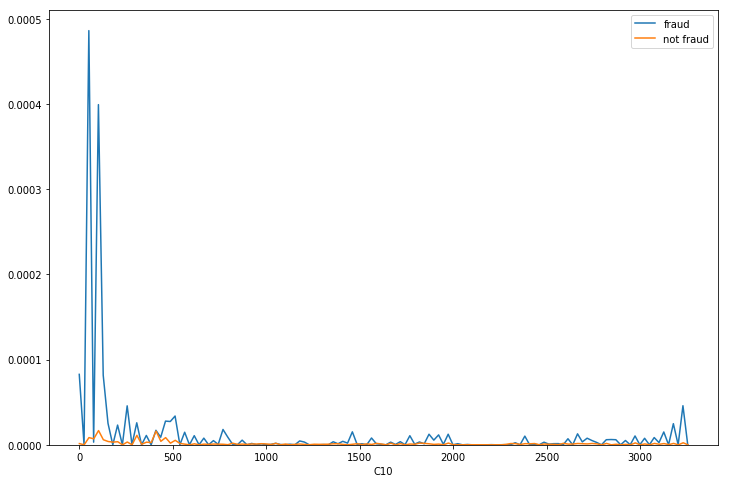

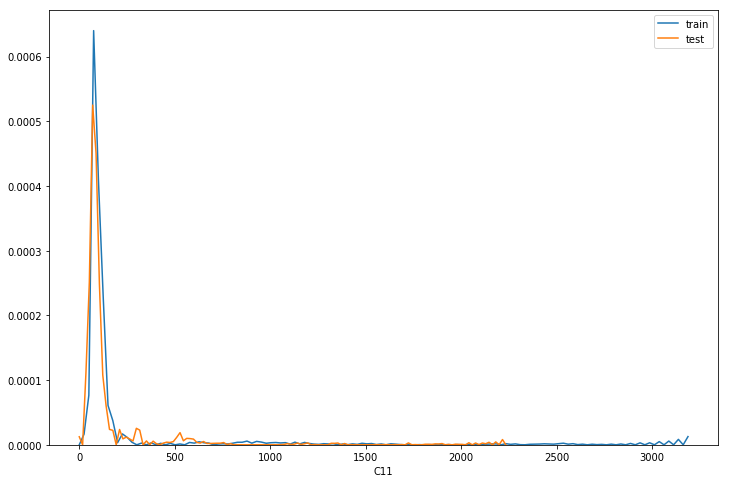

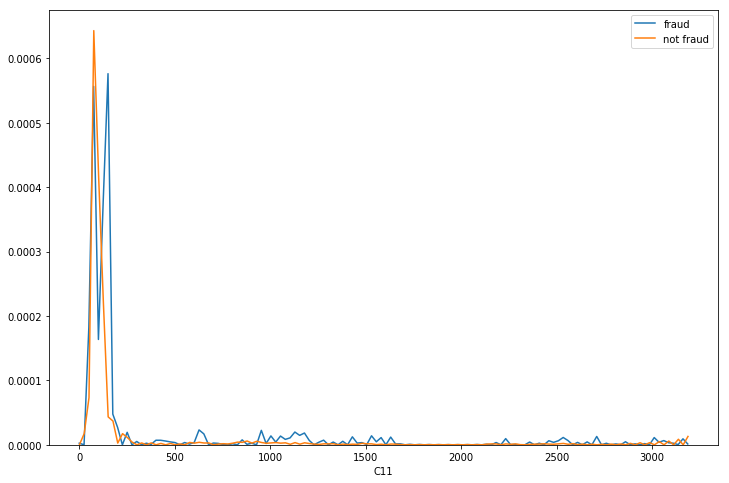

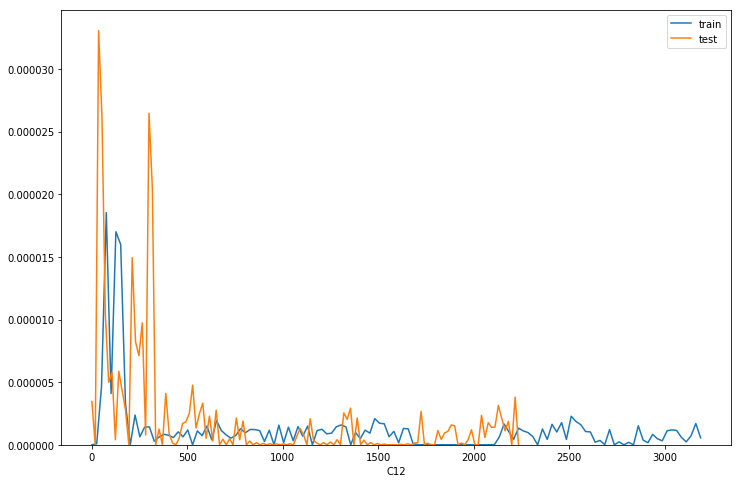

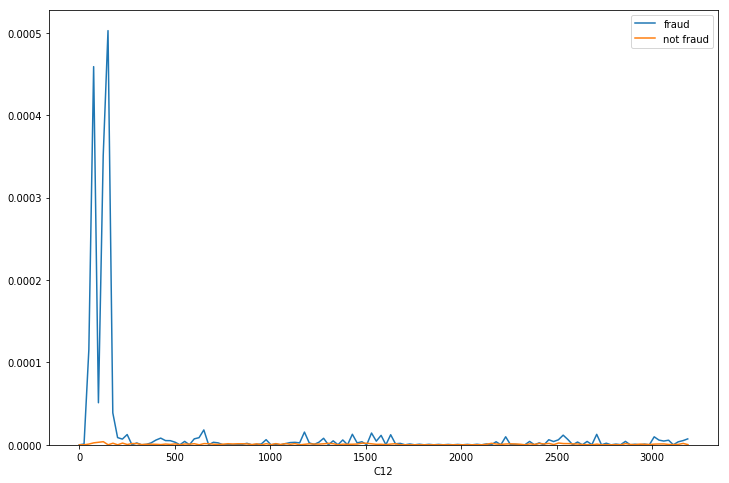

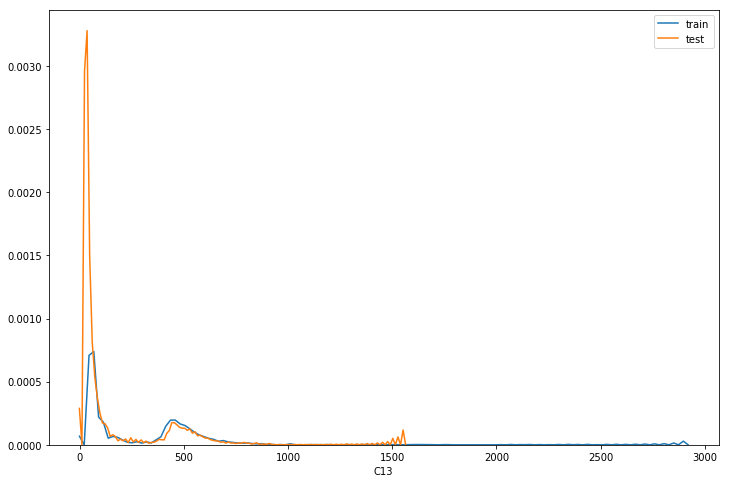

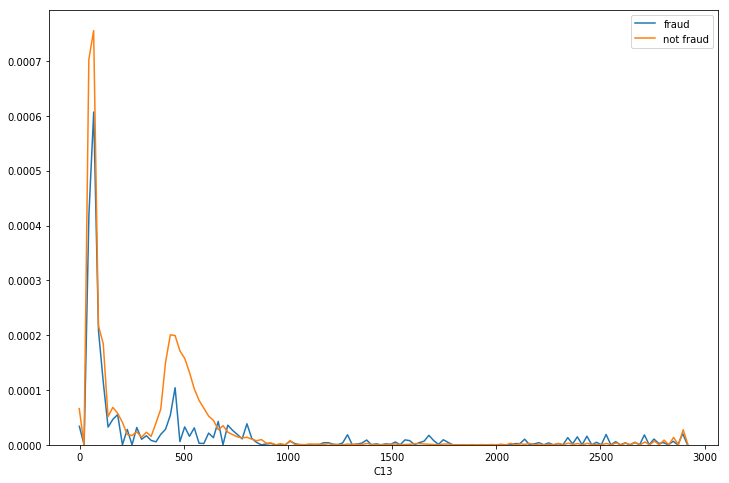

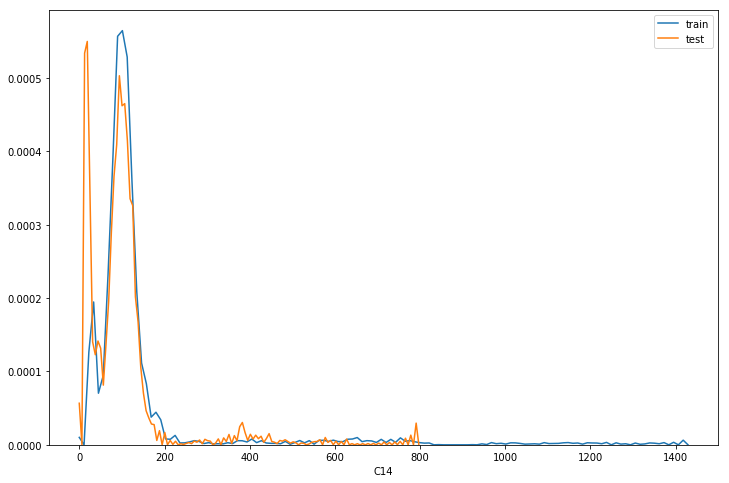

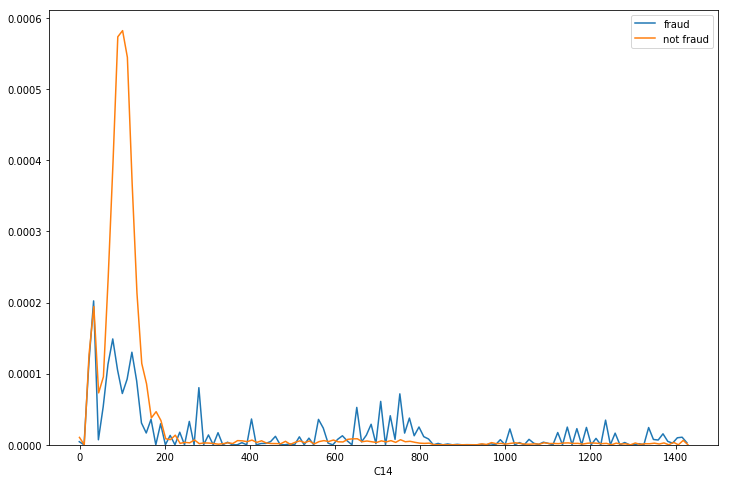

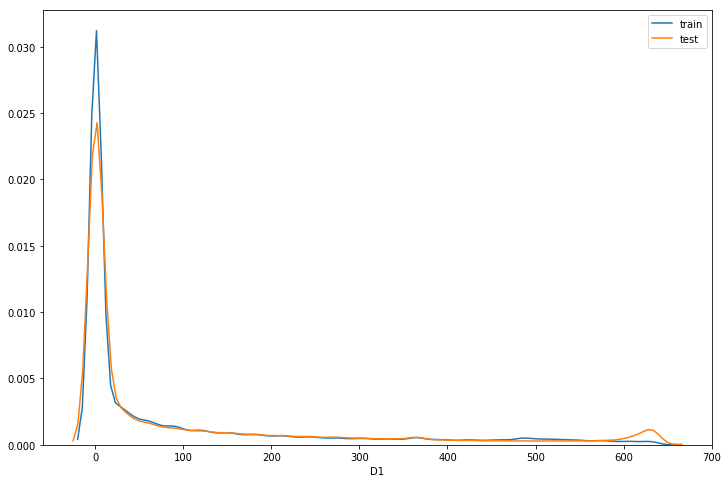

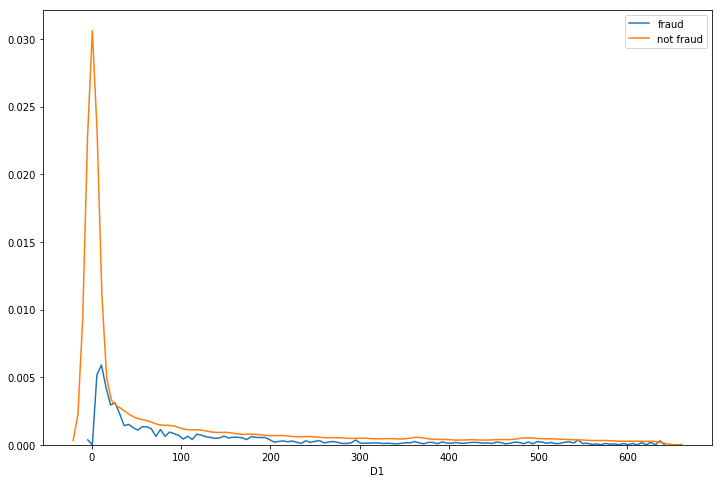

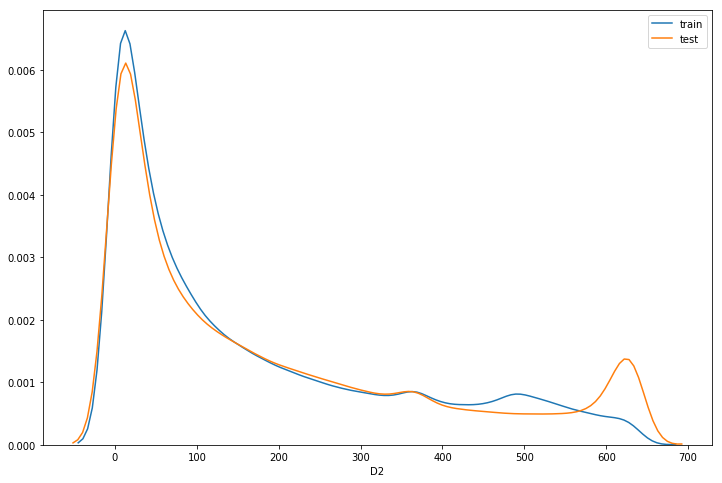

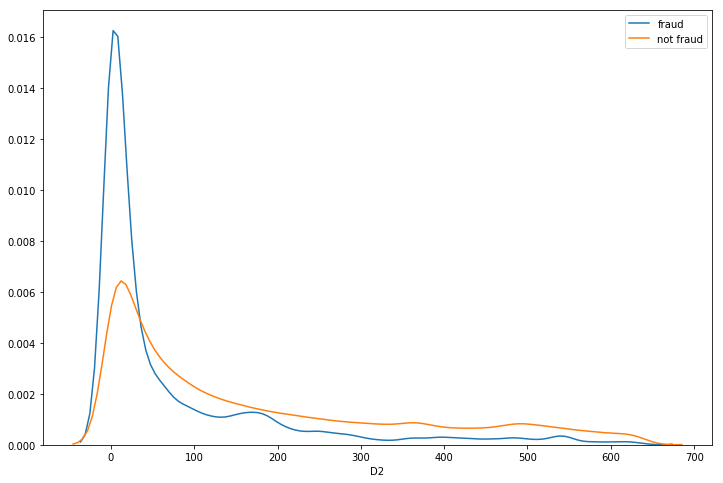

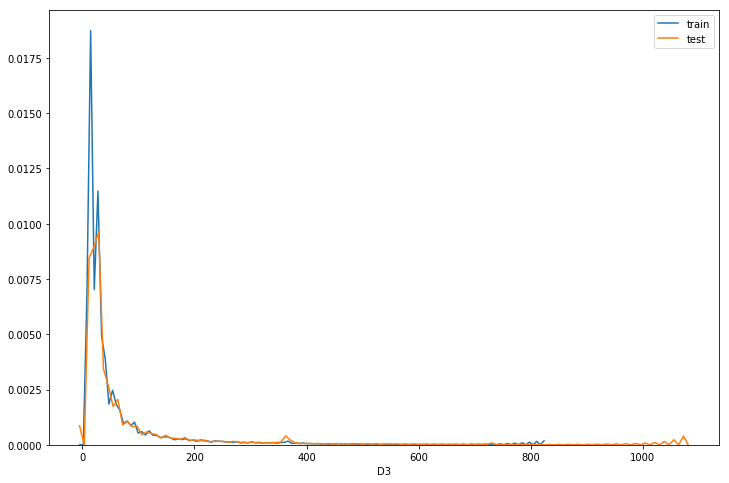

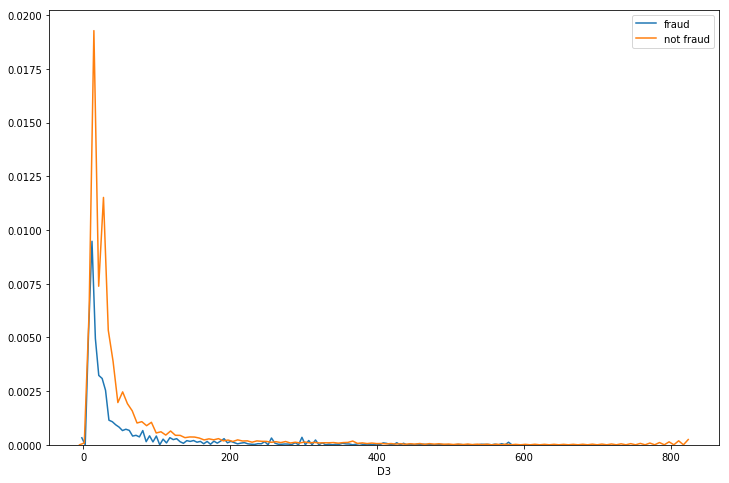

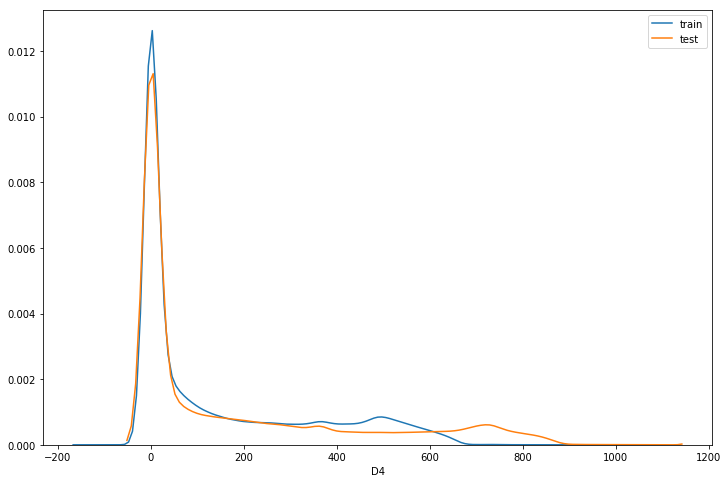

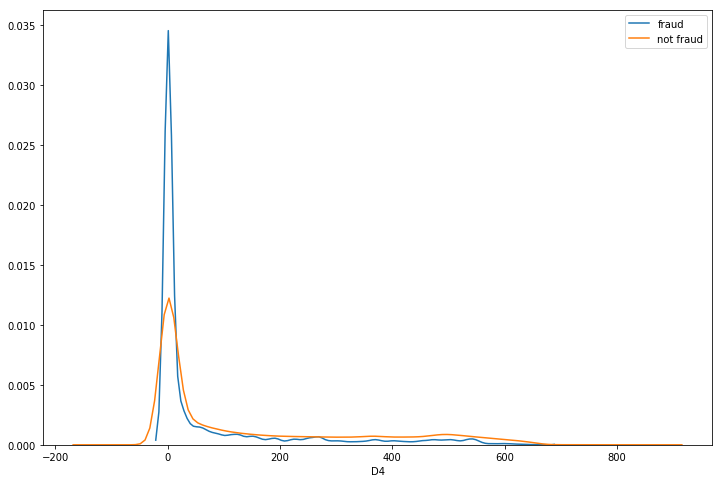

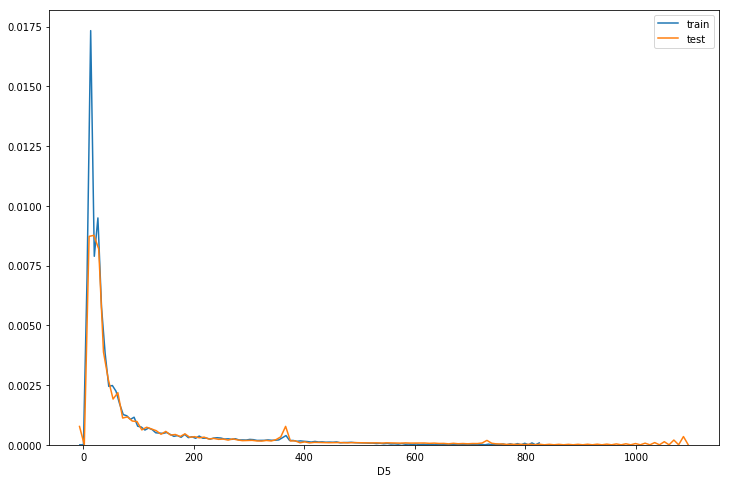

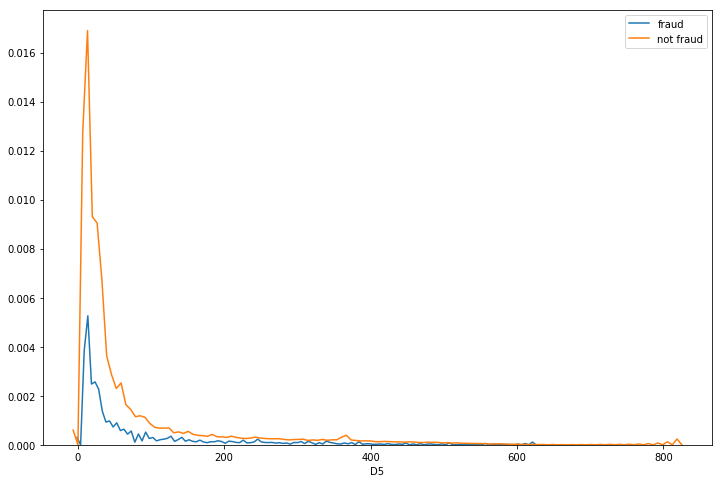

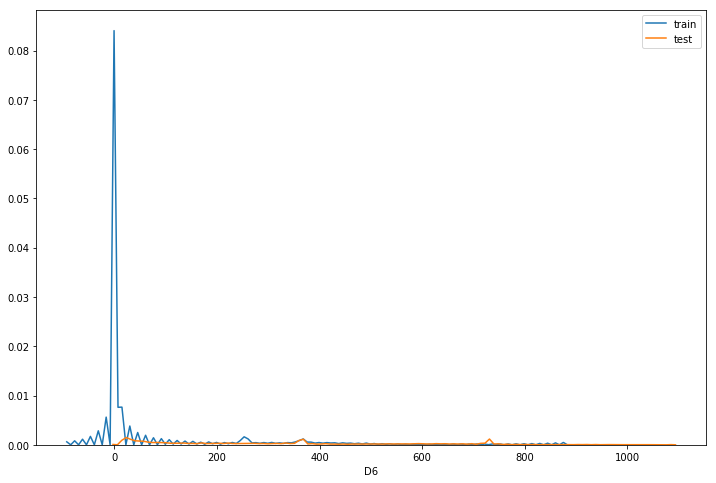

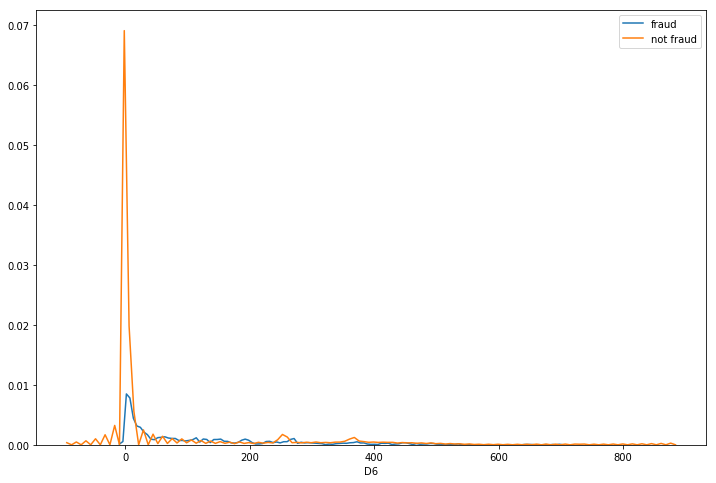

In [8]:
for feature in list(train)[:30]:
    plt.figure(figsize=(12,8))
    sns.distplot(train[train[feature].notna()][feature], label='train', hist=False)
    sns.distplot(test[test[feature].notna()][feature], label='test', hist=False)
    plt.legend()
    plt.show()


    plt.figure(figsize=(12,8))
    sns.distplot(train[(train['isFraud'] == 1) & (train[feature].notna())][feature], label='fraud', hist=False)
    sns.distplot(train[(train['isFraud'] == 0) & (train[feature].notna())][feature], label='not fraud', hist=False)
    plt.legend()
    plt.show()

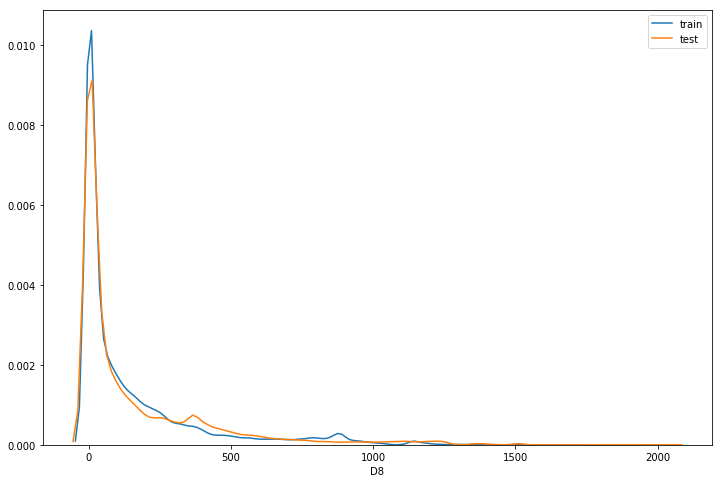

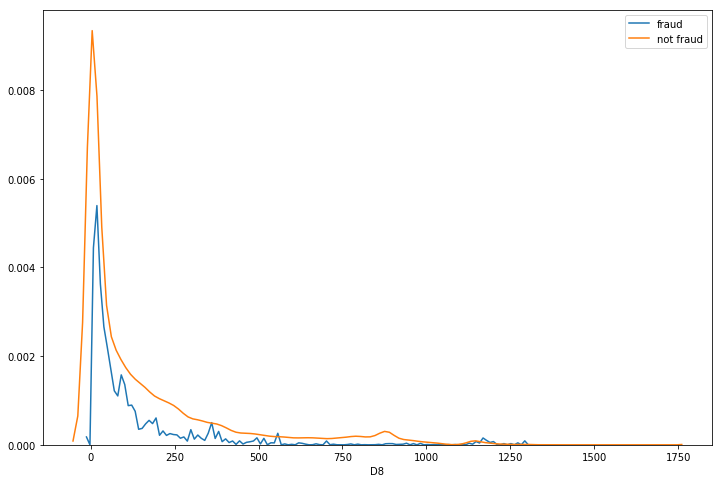

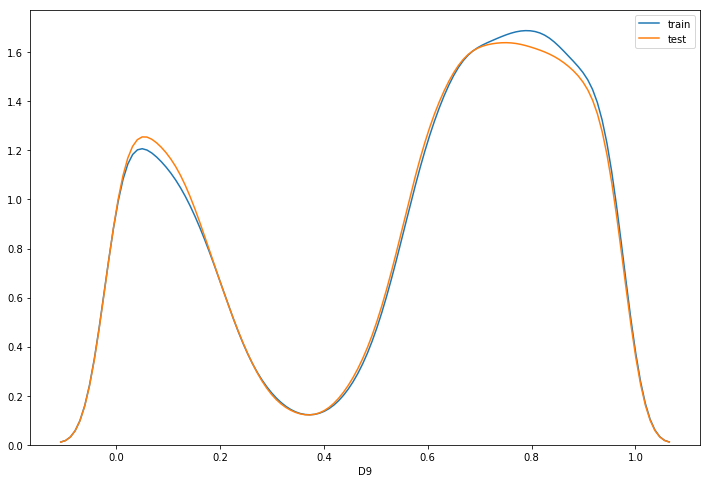

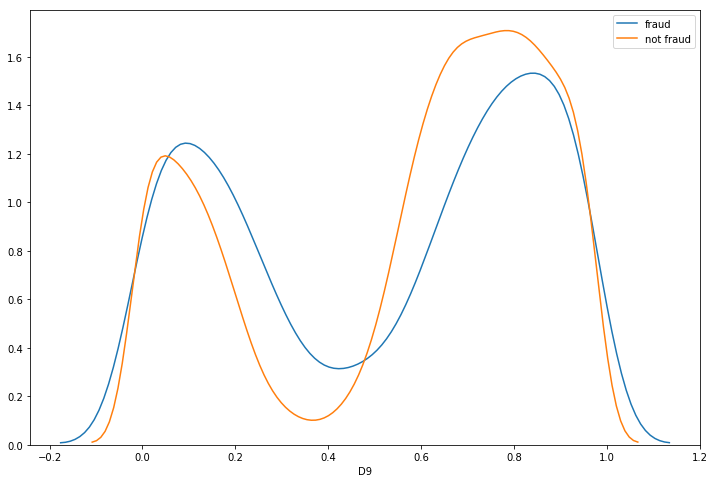

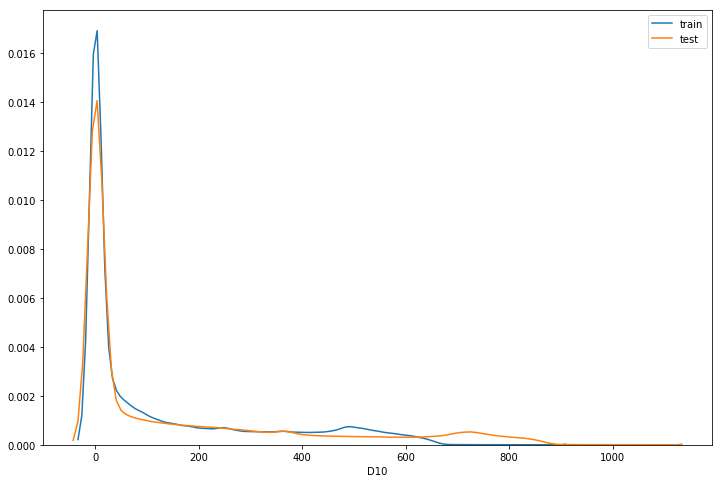

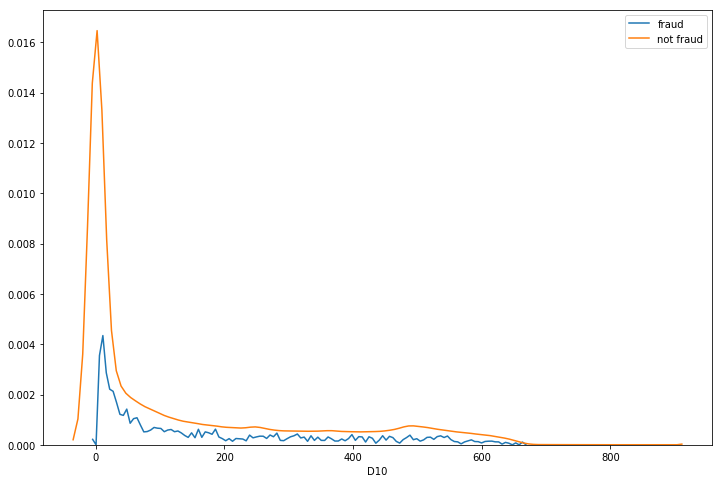

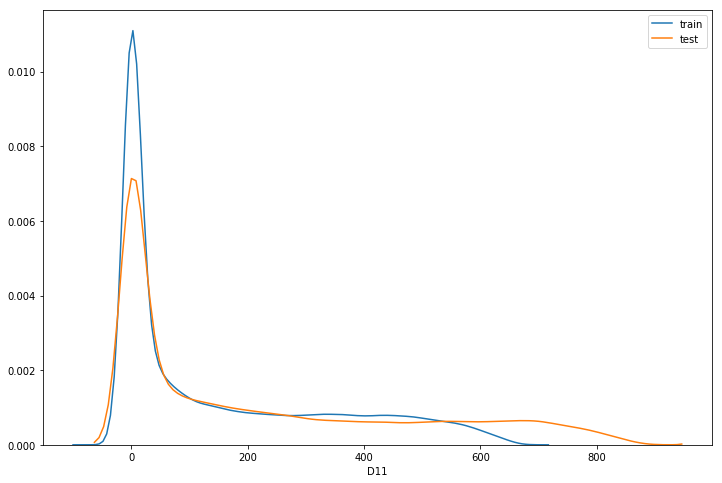

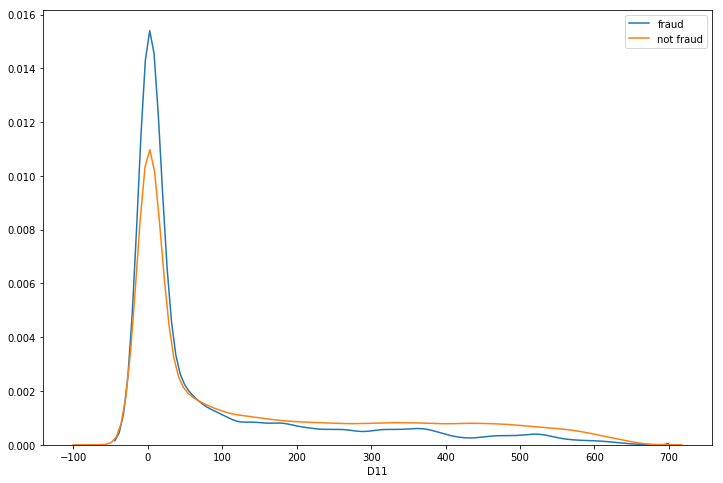

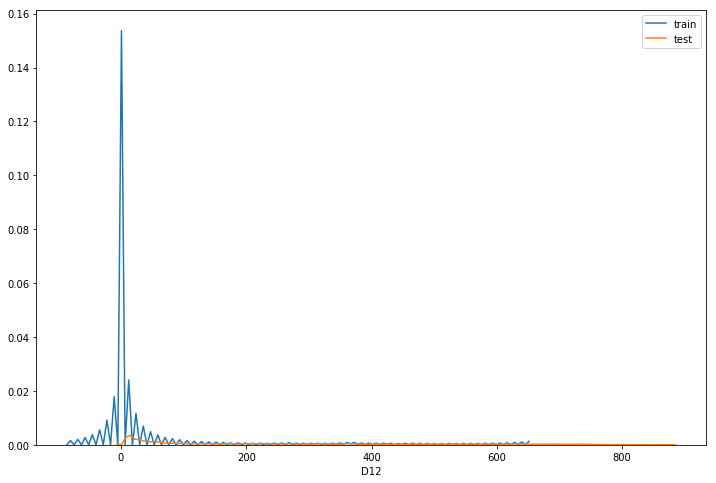

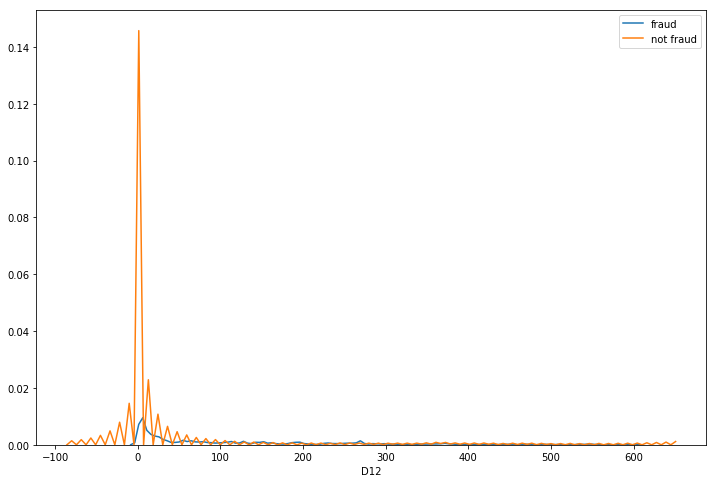

In [ ]:
for feature in list(train)[30:60]:
    plt.figure(figsize=(12,8))
    sns.distplot(train[train[feature].notna()][feature], label='train', hist=False)
    sns.distplot(test[test[feature].notna()][feature], label='test', hist=False)
    plt.legend()
    plt.show()


    plt.figure(figsize=(12,8))
    sns.distplot(train[(train['isFraud'] == 1) & (train[feature].notna())][feature], label='fraud', hist=False)
    sns.distplot(train[(train['isFraud'] == 0) & (train[feature].notna())][feature], label='not fraud', hist=False)
    plt.legend()
    plt.show()